In [5]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

import sys

sys.path.append("./../Algorithm/")
from utils import *


In [6]:
W = pd.read_pickle('../weights.pkl')
X = pd.read_pickle('../Data/X_t_train.pkl')
y = pd.read_pickle('../Data/y_t_train.pkl')
X_source = pd.read_parquet('turbofan_features.parquet', engine='pyarrow')

model = load_model()

In [3]:
print(W)

[[ 835.72398181  905.23026289  388.11457427  765.70984658 1243.88929113
   -49.89221736  -49.69616938 -304.60643866 -114.65642048 -298.19962663
    72.42960505 1273.81929877  995.14461887 1066.11878906 -425.16889508
   918.29183443 1010.00273647  243.35155519   46.55571334  875.79181042
   742.60045826 -187.21316353  588.32139673  818.08823213  590.03577152
  -517.54335432 -225.82120686  802.87473413  837.04842418  679.67544759
   319.14520763  475.23373362  513.77060178  482.27060278  402.40353777
   413.52259249  440.56020426  547.93641308  315.39287229  614.3044667
  -546.27258554  750.00644786  378.61995237  101.75352868  300.67496695
  -143.9403794  -275.77245664 -168.92257007  -99.7004768    81.16968771
   118.54445389  437.74761321  417.61596431  404.8700827   244.6730825
    -5.63665155  574.45834223   14.13313736  107.40403591   65.49035195
   103.69516755 -113.46304832  359.09473314  290.16556276  172.8899402
   127.67806754  202.1661198   -24.62159133  503.45093641  186.1717

In [4]:
X = rename_columns(X_source, X)
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X_hat = transfer_X(X, W)
output_translated = map_output(model.predict_proba(X_hat))

In [5]:
predicted_classes = np.argmax(output_translated, axis=1)+1
output_translated

array([[0.18590035, 0.22561839, 0.58848126],
       [0.3292022 , 0.30781744, 0.36298035],
       [0.3305539 , 0.33994768, 0.32949842],
       [0.32308435, 0.33873489, 0.33818075],
       [0.14703448, 0.17432388, 0.67864164],
       [0.32907944, 0.30794021, 0.36298035],
       [0.33676837, 0.33373321, 0.32949842],
       [0.32886073, 0.34164085, 0.32949842],
       [0.32504013, 0.33677911, 0.33818075],
       [0.32935706, 0.33246219, 0.33818075],
       [0.273779  , 0.27251269, 0.45370831],
       [0.26636389, 0.26512342, 0.46851269],
       [0.25705286, 0.25273352, 0.49021362],
       [0.25705286, 0.25273352, 0.49021362],
       [0.26298294, 0.24577979, 0.49123727],
       [0.26298294, 0.24577979, 0.49123727],
       [0.26298294, 0.24577979, 0.49123727],
       [0.26146827, 0.24065399, 0.49787774],
       [0.26146827, 0.24065399, 0.49787774],
       [0.15606792, 0.22199584, 0.62193624],
       [0.26636389, 0.26512342, 0.46851269]])

In [6]:
y

id
(1, 2023-01-01 09:46:12.710000)    1
(1, 2023-01-01 10:01:12.710000)    2
(1, 2023-01-01 10:16:12.710000)    3
(1, 2023-01-01 10:31:12.710000)    3
(2, 2023-01-01 09:11:33.679000)    1
(2, 2023-01-01 09:26:33.679000)    1
(2, 2023-01-01 09:41:33.679000)    1
(2, 2023-01-01 09:56:33.679000)    2
(2, 2023-01-01 10:11:33.679000)    2
(2, 2023-01-01 10:26:33.679000)    3
(2, 2023-01-01 10:41:33.679000)    3
(2, 2023-01-01 10:56:33.679000)    3
(2, 2023-01-01 11:11:33.679000)    3
(2, 2023-01-01 11:26:33.679000)    3
(2, 2023-01-01 11:41:33.679000)    3
(2, 2023-01-01 11:56:33.679000)    3
(2, 2023-01-01 12:11:33.679000)    3
(2, 2023-01-01 12:26:33.679000)    3
(2, 2023-01-01 12:41:33.679000)    3
(2, 2023-01-01 12:56:33.679000)    3
(2, 2023-01-01 13:24:00.960000)    3
Name: RUL_rolled_class, dtype: int64

In [7]:
predicted_classes

array([3, 3, 2, 2, 3, 3, 1, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
      dtype=int64)

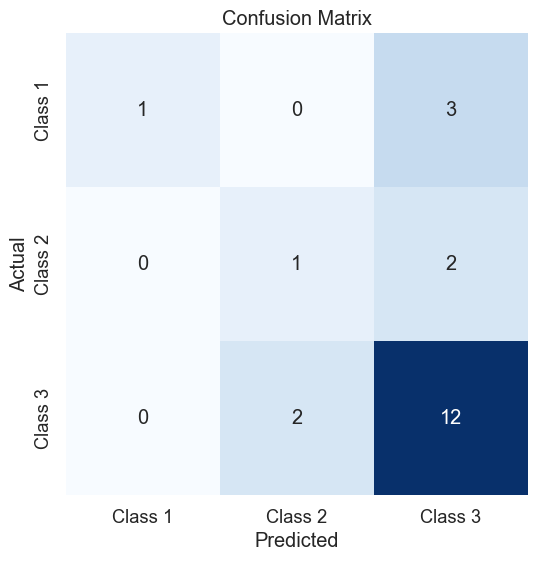

In [8]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_true=y, y_pred=predicted_classes)
# Define class labels (change to your own class labels)
class_labels = ["Class 1", "Class 2", "Class 3"]

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Adjust the font scale for better readability
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", cbar=False, square=True,
            xticklabels=class_labels, yticklabels=class_labels)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [9]:
from sklearn.utils import compute_class_weight

class_weights = compute_class_weight('balanced', classes=np.unique(y), y=y)

In [10]:
class_weights

array([1.75      , 2.33333333, 0.5       ])

In [11]:

calculate_f1_score(W, X, y)

0.5025089605734767

In [7]:
X

y__length  y__count_above_mean  \
1 2023-01-01 09:46:12.710   252160.0             126001.0   
  2023-01-01 10:01:12.710   367360.0             184075.0   
  2023-01-01 10:16:12.710   482560.0             241307.0   
  2023-01-01 10:31:12.710   597760.0             298504.0   
2 2023-01-01 09:11:33.679   252160.0             126271.0   
  2023-01-01 09:26:33.679   367360.0             183948.0   
  2023-01-01 09:41:33.679   482560.0             241650.0   
  2023-01-01 09:56:33.679   597760.0             299409.0   
  2023-01-01 10:11:33.679   712960.0             357040.0   
  2023-01-01 10:26:33.679   828160.0             414674.0   
  2023-01-01 10:41:33.679   943360.0             472305.0   
  2023-01-01 10:56:33.679  1058560.0             530039.0   
  2023-01-01 11:11:33.679  1173760.0             586489.0   
  2023-01-01 11:26:33.679  1288960.0             644589.0   
  2023-01-01 11:41:33.679  1404160.0             702317.0   
  2023-01-01 11:56:33.679  1519360.0             759902.0   
  2023-01-01 12:11:33.679  1634560.0             817983.0   
  2023-01-01 12:26:33.679  1749760.0             876000.0   
  2023-01-01 12:41:33.679  1864960.0             933778.0   
  2023-01-01 12:56:33.679  1980160.0             991593.0   
  2023-01-01 13:24:00.960  2095360.0            1049428.0   

                           y__percentage_of_reoccurring_datapoints_to_all_datapoints  \
1 2023-01-01 09:46:12.710                                           0.998921           
  2023-01-01 10:01:12.710                                           0.999224           
  2023-01-01 10:16:12.710                                           0.999353           
  2023-01-01 10:31:12.710                                           0.999436           
2 2023-01-01 09:11:33.679                                           0.998564           
  2023-01-01 09:26:33.679                                           0.998756           
  2023-01-01 09:41:33.679                                           0.998968           
  2023-01-01 09:56:33.679                                           0.999130           
  2023-01-01 10:11:33.679                                           0.999237           
  2023-01-01 10:26:33.679                                           0.999341           
  2023-01-01 10:41:33.679                                           0.999410           
  2023-01-01 10:56:33.679                                           0.999472           
  2023-01-01 11:11:33.679                                           0.999517           
  2023-01-01 11:26:33.679                                           0.999562           
  2023-01-01 11:41:33.679                                           0.999594           
  2023-01-01 11:56:33.679                                           0.999618           
  2023-01-01 12:11:33.679                                           0.999641           
  2023-01-01 12:26:33.679                                           0.999669           
  2023-01-01 12:41:33.679                                           0.999484           
  2023-01-01 12:56:33.679                                           0.999429           
  2023-01-01 13:24:00.960                                           0.999027           

                           y__ratio_value_number_to_time_series_length  \
1 2023-01-01 09:46:12.710                                     0.009542   
  2023-01-01 10:01:12.710                                     0.006931   
  2023-01-01 10:16:12.710                                     0.005506   
  2023-01-01 10:31:12.710                                     0.004572   
2 2023-01-01 09:11:33.679                                     0.009728   
  2023-01-01 09:26:33.679                                     0.007388   
  2023-01-01 09:41:33.679                                     0.005962   
  2023-01-01 09:56:33.679                                     0.004997   
  2023-01-01 10:11:33.679                                     0.004278   
  2023-

In [18]:
print(X_source.columns[1])

s_3__sum_values


In [4]:
for x in range(120):
    print(X_source.columns[x])

s_17__sum_values
s_3__sum_values
s_2__sum_values
s_4__length
s_8__length
s_9__length
s_11__length
s_12__length
s_7__length
s_13__length
s_3__length
s_15__length
s_17__length
s_20__length
s_2__length
s_21__length
s_15__sum_values
s_4__sum_values
s_11__sum_values
s_13__sum_values
s_8__sum_values
s_9__sum_values
s_20__sum_values
s_21__sum_values
s_7__sum_values
s_12__sum_values
s_11__variance
s_11__standard_deviation
s_4__variance
s_4__standard_deviation
s_12__variance
s_12__standard_deviation
s_20__variance
s_20__standard_deviation
s_7__standard_deviation
s_7__variance
s_4__absolute_maximum
s_4__maximum
s_13__variance
s_13__standard_deviation
s_3__maximum
s_3__absolute_maximum
s_21__minimum
s_11__absolute_maximum
s_11__maximum
s_15__standard_deviation
s_15__variance
s_20__minimum
s_15__absolute_maximum
s_15__maximum
s_17__absolute_maximum
s_17__maximum
s_21__standard_deviation
s_21__variance
s_7__minimum
s_12__minimum
s_9__variance
s_9__standard_deviation
s_17__variance
s_17__standard_de

IndexError: index 110 is out of bounds for axis 0 with size 110